In [62]:
import sklearn
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [5]:

# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
# summarize the dataset
print(X.shape, y.shape)
X

(1500, 15) (1500,)


array([[-3.07909992e-02, -2.15000090e+00,  4.06113723e-01, ...,
        -3.87102270e+00,  3.15071231e+00, -3.56439231e-01],
       [ 2.62109174e+00,  7.80606357e-03,  2.19522420e-01, ...,
         3.13631645e+00,  9.88027793e-01,  5.45420362e-01],
       [ 1.64146737e+00,  5.25847861e-01,  3.60484652e-01, ...,
         1.44732900e+00,  2.23809106e+00,  9.64208123e-01],
       ...,
       [-1.88101739e+00, -1.42225321e+00,  8.14127820e-01, ...,
        -3.61370296e+00, -2.32960578e-01, -1.57726576e+00],
       [ 1.24433222e+00, -3.19855733e+00, -3.06470444e+00, ...,
         2.41212924e+00,  3.93355880e+00, -1.94851533e-01],
       [-1.98870479e+00,  7.95557514e+00, -1.33655551e-01, ...,
        -3.16058335e+00,  2.57648588e+00,  1.03829618e+01]])

In [6]:
X_df=pd.DataFrame(X)
X_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.030791,-2.150001,0.406114,2.744499,4.111029,-3.341686,0.004778,-2.635335,3.282608,2.663295,-0.526096,5.704457,-3.871023,3.150712,-0.356439
1,2.621092,0.007806,0.219522,0.056599,-1.904542,-2.792696,3.178198,0.531338,-1.034521,-1.817117,1.101963,-2.798398,3.136316,0.988028,0.545420
2,1.641467,0.525848,0.360485,0.950746,3.770628,0.000691,1.926858,-0.935570,3.089082,-0.587995,4.338921,0.712775,1.447329,2.238091,0.964208
3,-1.385630,1.819332,-1.849438,-2.428066,0.421719,2.500679,-4.595735,-2.661696,-0.122273,0.774333,1.348948,-1.177416,-2.289376,-1.615061,0.983485
4,1.871680,-2.389129,-0.228013,0.328249,-0.421519,-0.917150,-2.873442,0.570219,0.915405,-0.490057,-2.216524,-3.271888,0.391024,-2.811050,-4.512691


Linear Regression, Decition Tree do not give us prediction with higher than 49% accuracy, with any number or combination of features, so these algorithms just do not work on this dataset. So, let us start with Logistic Regression
# Logistic Regression Feature Importance and Feature Engineering

Feature: 0, Score: -0.21307
Feature: 1, Score: 0.18819
Feature: 2, Score: -0.01845
Feature: 3, Score: -0.07663
Feature: 4, Score: -0.29523
Feature: 5, Score: 0.52244
Feature: 6, Score: 0.40752
Feature: 7, Score: 0.26888
Feature: 8, Score: -0.37708
Feature: 9, Score: 0.02222
Feature: 10, Score: 0.32626
Feature: 11, Score: 0.17642
Feature: 12, Score: 0.27968
Feature: 13, Score: 0.14062
Feature: 14, Score: 0.32904


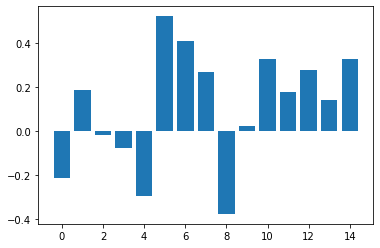

In [41]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model_lg = LogisticRegression()
# fit the model
model_lg.fit(X, y)
# get importance
importance = model_lg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
cross_val_score(model_lg, X,y).mean()

0.8413333333333334

In [42]:
# Check how many feachures we need for the highest accuracy: 

X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
X=pd.DataFrame(X)
features = list(range(2,16))
mean_accuracy = []

for i in features:
  pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=i)),
                     ('log_reg', LogisticRegression(random_state=0))])
  
  
  pipe.fit(X,y)

  scores = cross_val_score(pipe, X_df, y, cv=5)
  
  mean_accuracy.append(scores.mean())

print(mean_accuracy)



[0.7406666666666666, 0.7766666666666666, 0.8373333333333333, 0.842, 0.8379999999999999, 0.8413333333333334, 0.8413333333333334, 0.8413333333333334, 0.8406666666666667, 0.8413333333333334, 0.8406666666666667, 0.8406666666666667, 0.8406666666666667, 0.8406666666666667]


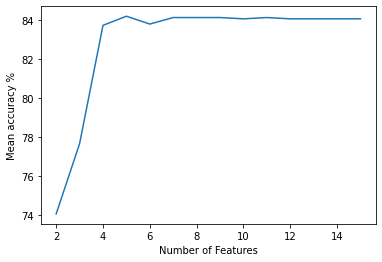

In [18]:

k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
# 5 features (out of 7 of importance) are enough for this model according to this picture. Let is try to Scale it and chose only 5 fratures: 

In [19]:
pipe5     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                     ('log_reg', LogisticRegression(random_state=42))])
pipe5.fit(X,y)

scores5 = cross_val_score(pipe5, X, y, cv=5)
print(scores5.mean())

0.842


In [ ]:
#Let us check which features are important and apply them directly: 

In [44]:
Feature_support = pd.DataFrame(pipe5.named_steps['rfe'].support_, index=X.columns)
Feature_support.rename({0:'Feature Support'}, axis=1, inplace=True)
Feature_support = Feature_support.sort_values(by=['Feature Support'], ascending=False)
print(Feature_support)

    Feature Support
4              True
5              True
6              True
10             True
14             True
0             False
1             False
2             False
3             False
7             False
8             False
9             False
11            False
12            False
13            False


In [21]:
X_f = X[[4,5,6,10,14]]
X_f.head(3)

,4,5,6,10,14
0,4.111029,-3.341686,0.004778,-0.526096,-0.356439
1,-1.904542,-2.792696,3.178198,1.101963,0.545420
2,3.770628,0.000691,1.926858,4.338921,0.964208


In [26]:
pipe_f     = Pipeline([('scaler', StandardScaler()), 
                     ('log_reg', LogisticRegression(random_state=42))])

# fit the model
pipe_f.fit(X_f, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=42))])

In [27]:
score = cross_val_score(pipe_f, X_f, y).mean()
print(score)

0.8426666666666668


In [ ]:
# We increase accuracy from 0.842 to 0.8426

# Random Forest (regression model) Feature Importnace

Feature: 0, Score: 0.05067
Feature: 1, Score: 0.02679
Feature: 2, Score: 0.03078
Feature: 3, Score: 0.01225
Feature: 4, Score: 0.02860
Feature: 5, Score: 0.07521
Feature: 6, Score: 0.12107
Feature: 7, Score: 0.02684
Feature: 8, Score: 0.15290
Feature: 9, Score: 0.05235
Feature: 10, Score: 0.31945
Feature: 11, Score: 0.02247
Feature: 12, Score: 0.02113
Feature: 13, Score: 0.03203
Feature: 14, Score: 0.02748


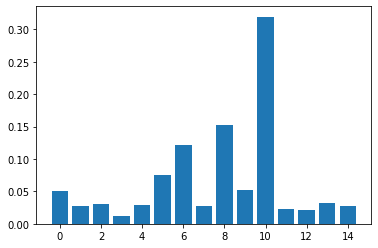

In [30]:

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
# define the model
model_rf = RandomForestRegressor()
# fit the model
model_rf.fit(X, y)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
cross_val_score(model_rf, X,y).mean()

0.738864360541881

In [45]:
pca = PCA(0.999)
pca.fit(X)

X_components = pca.transform(X)
mod_rf = RandomForestRegressor()
mod_rf.fit(X_components,y)
cross_val_score(mod_rf, X_components,y).mean()

0.7473644292317072

In [ ]:
# Implementation of PCA gave us 1.1% better accuracy

# Random Forest (classification) Feature Importance

Feature: 0, Score: 0.06087
Feature: 1, Score: 0.04391
Feature: 2, Score: 0.06735
Feature: 3, Score: 0.03356
Feature: 4, Score: 0.06223
Feature: 5, Score: 0.11077
Feature: 6, Score: 0.07449
Feature: 7, Score: 0.04098
Feature: 8, Score: 0.09490
Feature: 9, Score: 0.04291
Feature: 10, Score: 0.18552
Feature: 11, Score: 0.03219
Feature: 12, Score: 0.03746
Feature: 13, Score: 0.05218
Feature: 14, Score: 0.06070


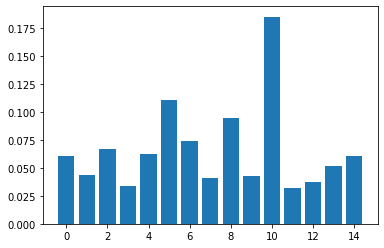

In [46]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
# define the model
model_rfc = RandomForestClassifier(random_state=42)
# fit the model
model_rfc.fit(X, y)
# get importance
importance = model_rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
cross_val_score(model_rfc,X,y).mean()

0.9279999999999999

In [48]:
pca = PCA(0.9999)
pca.fit(X)

X_components = pca.transform(X)
mod_rfc = RandomForestClassifier(random_state=42)
mod_rfc.fit(X_components,y)
cross_val_score(model_rfc, X_components,y).mean()

0.922

In [49]:
features = list(range(6,16))
mean_accuracy = []

for i in features:
  pipe_rfc     = Pipeline([('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=i)),
                     ('mod_rfc', RandomForestClassifier(random_state=42))])

  pipe_rfc.fit(X, y)

  scores = cross_val_score(pipe_rfc, X, y, cv=5)
  mean_accuracy.append(scores.mean())

print(mean_accuracy)



[0.8953333333333333, 0.9113333333333333, 0.908, 0.9166666666666667, 0.9206666666666667, 0.9273333333333333, 0.9246666666666666, 0.9266666666666667, 0.9246666666666666, 0.9279999999999999]


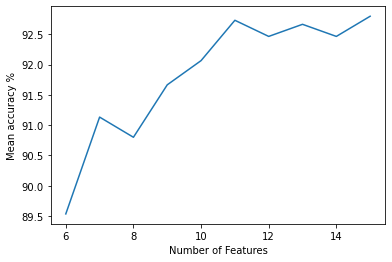

In [50]:
k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

In [52]:
pipe_rfc13     = Pipeline([('rfe', RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)),
                     ('mod_rfc', RandomForestClassifier(random_state=42))])

pipe_rfc13.fit(X, y)
cross_val_score(pipe_rfc13,X,y).mean()

0.9279999999999999

In [ ]:
# Implementation Feature Engineering for Random Forest algorithm doesn't give us any improvement. 

# XGBoost Regression Feature Importance

[21:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.06290
Feature: 1, Score: 0.03552
Feature: 2, Score: 0.02414
Feature: 3, Score: 0.01161
Feature: 4, Score: 0.05624
Feature: 5, Score: 0.08443
Feature: 6, Score: 0.11996
Feature: 7, Score: 0.03153
Feature: 8, Score: 0.13562
Feature: 9, Score: 0.03725
Feature: 10, Score: 0.24128
Feature: 11, Score: 0.01683
Feature: 12, Score: 0.02650
Feature: 13, Score: 0.06073
Feature: 14, Score: 0.05548


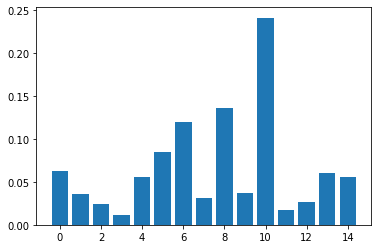

In [54]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
# define the model
model_xgb = XGBRegressor()
# fit the model
model_xgb.fit(X, y)
# get importance
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [55]:

cross_val_score(model_xgb,X,y).mean()

[21:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7119186286123262

In [58]:
pca = PCA(0.9999)
pca.fit(X)

X_components = pca.transform(X)

model_xgb.fit(X_components,y)
cross_val_score(model_rfc, X_components,y).mean()

[21:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.922

In [ ]:
# Applicatioin of feature Engineering on XGBoost Regression gace us increasing of accuracy from 71 to 92.2% 

# Permutation Feature Importance with KNN for Regression

Feature: 0, Score: -0.00073
Feature: 1, Score: 0.00941
Feature: 2, Score: 0.00427
Feature: 3, Score: 0.00774
Feature: 4, Score: 0.01639
Feature: 5, Score: 0.08468
Feature: 6, Score: 0.02873
Feature: 7, Score: 0.00292
Feature: 8, Score: 0.00822
Feature: 9, Score: 0.00286
Feature: 10, Score: 0.01564
Feature: 11, Score: 0.01376
Feature: 12, Score: 0.00740
Feature: 13, Score: 0.00281
Feature: 14, Score: 0.02308


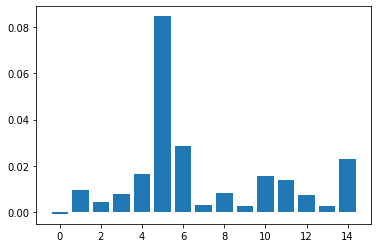

In [59]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1500, n_features=15, n_informative=7, n_redundant=8, random_state=42)
# define the model
model_knnr = KNeighborsRegressor()
# fit the model
model_knnr.fit(X, y)
# perform permutation importance
results = permutation_importance(model_knnr, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Permutation feature Importance 

In [57]:
cross_val_score(model_knnr,X,y).mean()

0.7456422436584013

In [60]:
pca = PCA(0.99999)
pca.fit(X)

X_components = pca.transform(X)
model_knnr.fit(X_components,y)
cross_val_score(model_knnr, X_components,y).mean()

0.7456422436584013

In [61]:
# Using PCA on KNN Regretion does not change the accuracy at all. 